In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [6]:
test_file = './segdata/Alabama/blocks/seg-43290879-Alabama-179492-0002.jpg'

In [7]:
test_img = cv2.imread(test_file)

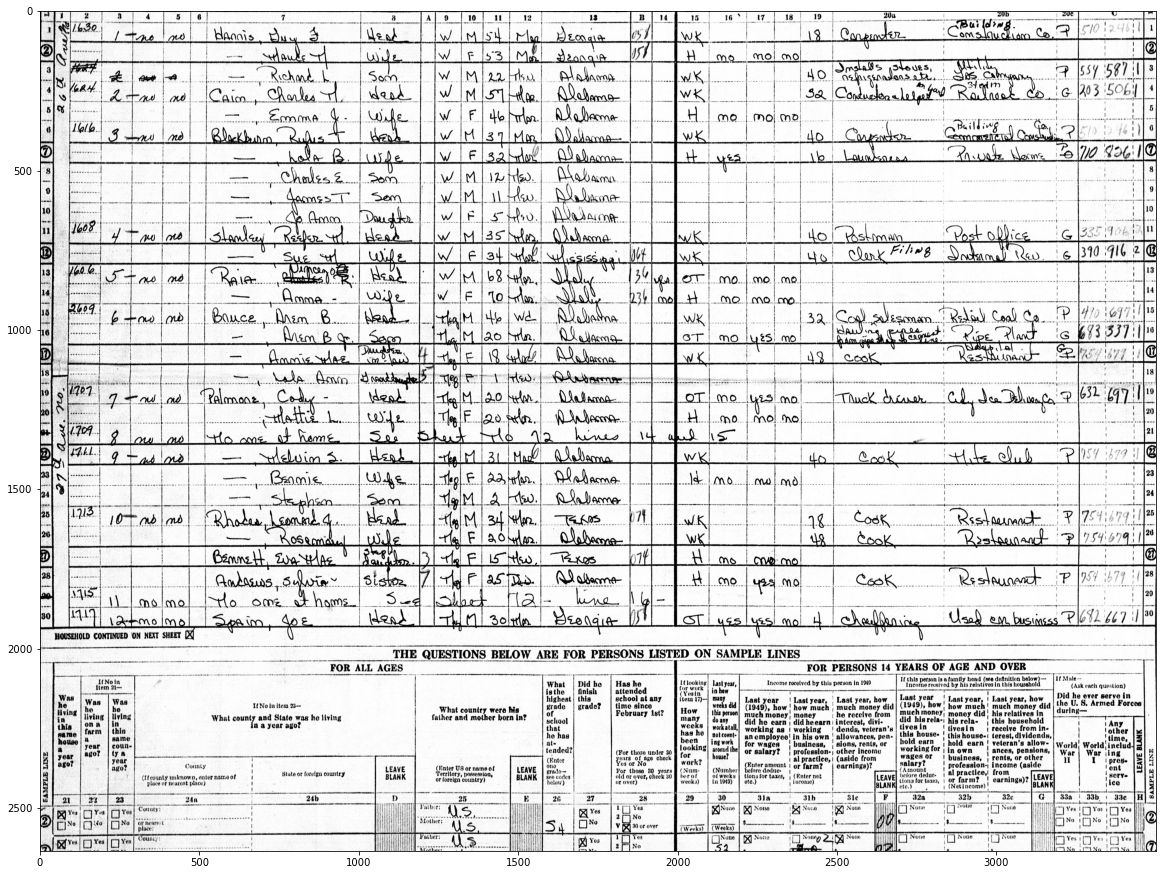

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(test_img)

Let's consider which columns- 7, name is vital. Let's also look at 8- position, 9- race, 10- gender, 11-age, 13-place of origin, 20a- profession, 20b- place of work. I think those alone would be quite interesting. Of course, the columns can be increased and decreased as necessary

In [73]:
test_img.shape[0]

2634

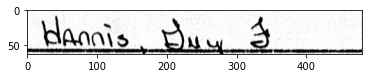

In [11]:
plt.imshow(test_img[40:103,525:1005,:])

In [64]:
col_dict = {7:(525,1005),8:(1005,1195),9:(1245,1320),
           10:(1320,1390),11:(1390,1475),13:(1575,1855),
            20:(2485,2835),21:(2835,3190)}

In [65]:
col_meaning = {7:('name','n'),
              8:('position','p'),
              9:('race','r'),
              10:('gender','g'),
              11:('age','a'),
              13:('origin','o'),
              20:('job','j'),
              21:('workplace','w')}

In [113]:
def cell_from_seg(directory,rand_int,colcut,colname,rowcut,start,end,outfolder):
    """
    From directory, pull all images in all subdirs. Using the rand_int, create a generator to shuffle the
    list of image-files. Cut the images from start to end. This allows a person to collect a set of cut
    cells, evaluate how many actually are good and labelable, then proceed in labeling, or run the function
    again until there are enough 'cells' to be labeled. The rand_int makes sure the shuffle is reproducible
    The cuts are made using a dictionary, colcut, and a tuple of start, row height for rowcut. colname is used
    in naming cells. Please keep in mind that if you do use this function multiple times, that your old end will 
    be your start
    Directory SHOULD NOT HAVE a final slash
    """
    files = next(os.walk(directory))[1][1:] #1: avoids ipynb_checkpoints
    filenames = [next(os.walk(directory+'/'+state+'/blocks'))[2] for state in files]
    filelist = [file for sublist in filenames for file in sublist if file.split('-')[0]=='seg']
    rngen = np.random.default_rng(rand_int)
    rngen.shuffle(filelist)
    failed = np.array([])
    for file in filelist[start:end]:
        fullpath = directory+'/'+file.split('-')[2]+'/blocks/'+file
        nameprefix = '-'.join(file.split('-')[1:]).split('.')[0]
        img = cv2.imread(fullpath)
        if img.shape[0]<(rowcut[0]+30*rowcut[1]) or img.shape[1]<max(colcut.values())[1]:
            failed = np.append(failed,[file])
        else:
            for col,value in colcut.items():
                count = 0
                for row in [rowcut[0]+rowcut[1]*i for i in range(30)]:
                    cell = img[row:(row+rowcut[1]),value[0]:value[1],:]
                    outname = outfolder+nameprefix+'-'+colname[col][1]+'-'+str(count)+'.jpg'
                    cv2.imwrite(outname,cell)
                    count = count+1
        
        
        
    return failed
    

In [116]:
failed = cell_from_seg('./segdata',815,col_dict,col_meaning,(40,63),0,20,'cell-labels/')

In [117]:
failed

array([], dtype=float64)

No failures! That's something!